# Template

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, savgol_filter
from matplotlib.lines import Line2D

plt.style.use('science')
plt.rcParams.update({'font.size': 14})

# Plot Measure

In [3]:
def get_all_csv() -> list[str]:
    files = sorted([i for i in os.listdir(os.getcwd() + '/data') if i[-4:] == '.csv'])
    if not files:
        print(f"Keine .csv Dateien gefunden.")
        return []

    return list(files)

# Versuch 1 Siliziumdiode

[0.00998 0.01032 0.0105  0.01063 0.01073 0.01079 0.01084 0.01088 0.01092
 0.01096 0.01099 0.01102 0.01105 0.01108 0.0111  0.01113 0.01115] [0.1595 0.31   0.4552 0.6029 0.747  0.854  0.968  1.052  1.149  1.255
 1.353  1.451  1.549  1.646  1.753  1.848  1.949 ]


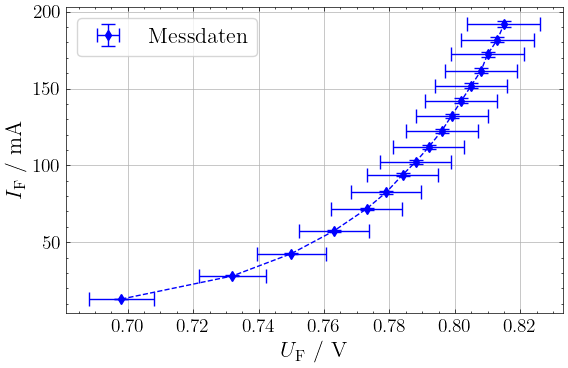

In [ ]:
# Gleichrichterdiode Durchlassrichtung
I_F = np.array([12.95, 28.0, 42.52, 57.29, 71.7, 82.4, 93.8, 102.2, 111.9, 122.5, 132.3, 142.1, 151.9, 161.6, 172.3, 181.8, 191.9]) #mA
U_F = np.array([0.698, 0.732, 0.750, 0.763, 0.773, 0.779, 0.784, 0.788, 0.792, 0.796, 0.799, 0.802, 0.805, 0.808, 0.810, 0.813, 0.815]) #V
dU = U_F*0.01 + 0.003
dI = I_F*0.01 + 0.03
print(dU, dI)
fig, ax = plt.subplots(1,1, figsize=(6, 4))

ax.errorbar(x=U_F, y=I_F, xerr=dU, yerr=dI, fmt='d', color='blue', 
                capsize=5, label=r'Messdaten', markersize=5)
ax.plot(U_F, I_F, 'b--')
ax.set_xlabel(r'$U_\text{F}$ / $\text{V}$', fontsize=16)
ax.set_ylabel(r'$I_\text{F}$ / $\text{mA}$', fontsize=16)
ax.legend(frameon=True, fontsize=16)
ax.grid(True)
plt.tight_layout()
plt.show()

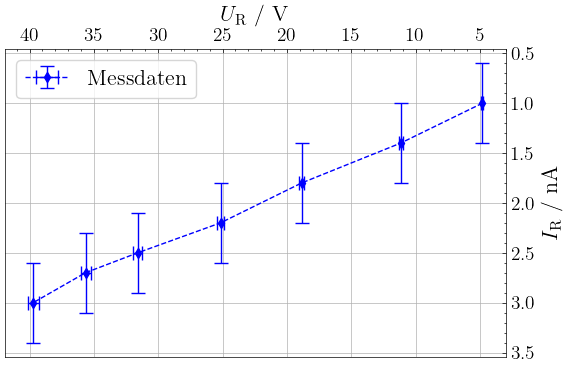

In [7]:
U_Ser = np.array([4.813, 11.16, 18.86, 25.16, 31.59, 35.65, 39.71])  # V
U_R2 = np.array([0.001, 0.0014, 0.0018, 0.0022, 0.0025, 0.0027, 0.003])  # V

dU_Ser = U_Ser*0.01 + 0.03
dU_r2 = U_R2*0.0008 + 0.0004

U_R = U_Ser - U_R2
dU = dU_Ser + dU_r2

I_F = U_R2 * 1000     # nA
dI  = dU_r2 *1000     # nA

fig, ax = plt.subplots(figsize=(6, 4))

ax.errorbar(U_R, I_F, xerr=dU, yerr=dI, fmt='b--d', capsize=5, markersize=5, label=r'Messdaten')

# --- Mirror both axes into the negative direction ---
ax.invert_xaxis()
ax.invert_yaxis()

# --- Move y-axis to the right ---
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

# Labels and grid
ax.set_xlabel(r'$U_\text{R}$ / $\text{V}$', fontsize=16)
ax.set_ylabel(r'$I_\text{R}$ / $\text{nA}$', fontsize=16)
ax.grid(True)

ax.legend(frameon=True, fontsize=16)
plt.tight_layout()
plt.show()

# Versuch 2 Zener Diode

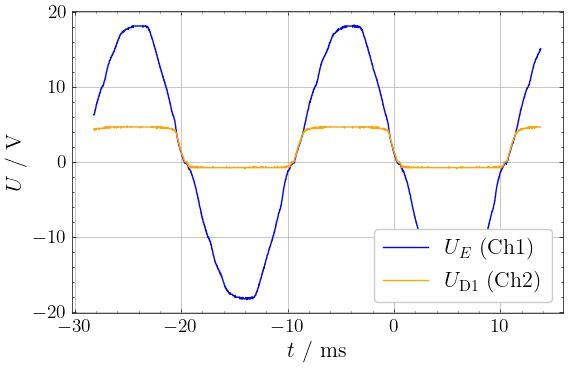

In [8]:
files = get_all_csv()
V02_ZDiode_1, V02_ZDiode_2 = files[0], files[1]

data = pd.read_csv(f'data/{V02_ZDiode_1}', skiprows=2, header=None)

time = data[0] 
U_E = data[1]
U_D1 = data[2]

U_R = U_E - U_D1

R = 100.0  # Ohm
I = U_R / R

# Create figure
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(time*1000, U_E, label=r'$U_E$ (Ch1)', color='blue')
ax.plot(time*1000, U_D1, label=r'$U_\text{D1}$ (Ch2)', color='orange')
ax.set_xlabel(r'$t$ / $\text{ms}$', fontsize=16)
ax.set_ylabel(r'$U$ / $\text{V}$', fontsize=16)
ax.grid(True)
ax.legend(frameon=True, loc='lower right', framealpha=1, fontsize=16)
plt.tight_layout()
plt.show()

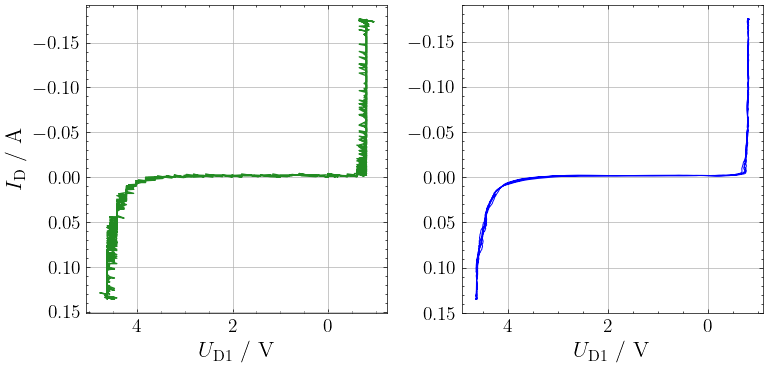

In [57]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))

ax1.plot(U_D1, I, color='forestgreen', linewidth=1)
ax1.invert_xaxis()
ax1.invert_yaxis()
ax1.set_xlabel(r'$U_\text{D1}$ / V', fontsize=16)
ax1.set_ylabel(r'$I_\text{D}$ / A', fontsize=16)
ax1.grid(True)

I_smooth = savgol_filter(I, window_length=31, polyorder=2)
U_smooth = savgol_filter(U_D1, window_length=31, polyorder=2)

ax2.invert_xaxis()
ax2.invert_yaxis()
ax2.plot(U_smooth, I_smooth, '-', color='blue', linewidth=0.7, label='Geglättet (Savitzky-Golay)')
ax2.set_xlabel(r'$U_\text{D1}$ / V', fontsize=16)
ax2.grid(True)
plt.tight_layout()
plt.show()

## mehr Perioden

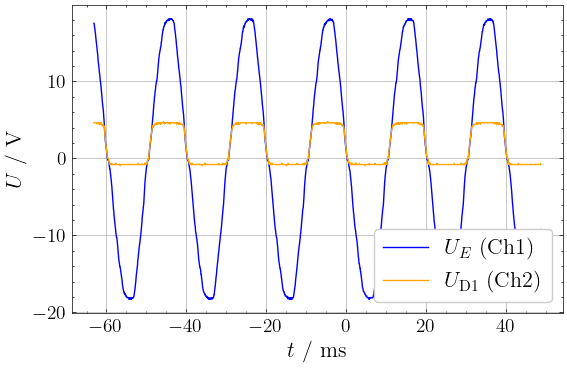

In [101]:
V02_ZDiode_1, V02_ZDiode_2 = files[0], files[1]

data = pd.read_csv(f'data/{V02_ZDiode_2}', skiprows=2, header=None)

time = data[0] 
U_E = data[1]
U_D1 = data[2]

div = 5.0  # volts per division
delta_U_E  = 0.01 * np.abs(U_E) + 0.05*div
delta_U_D1 = 0.01 * np.abs(U_D1) + 0.05*div

U_R = U_E - U_D1
delta_U_R = np.abs(delta_U_E) + np.abs(delta_U_D1)

R = 100.0  # Ohm
I = U_R / R
delta_I = delta_U_R / R

# Create figure
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(time*1000, U_E, label=r'$U_E$ (Ch1)', color='blue')
ax.plot(time*1000, U_D1, label=r'$U_\text{D1}$ (Ch2)', color='orange')
ax.set_xlabel(r'$t$ / $\text{ms}$', fontsize=16)
ax.set_ylabel(r'$U$ / $\text{V}$', fontsize=16)
ax.grid(True)
ax.legend(frameon=True, loc='lower right', framealpha=1, fontsize=16)
plt.tight_layout()
plt.show()

# Versuch 3

## Single Plots

In [13]:
def plot_measurement(filepath, R3, save=False):
    data = pd.read_csv(f"data/{filepath}", skiprows=2, header=None)
    time, Ch1, Ch2, Ch3, Ch4 = data.T.values

    Ch1 = savgol_filter(Ch1, 21, 2)
    Ch2 = savgol_filter(Ch2, 21, 2)
    Ch3 = savgol_filter(Ch3, 21, 2)
    Ch4 = savgol_filter(Ch4, 21, 2)

    R1, R2 = 10, 10
    time = time * 1000  # ms

    voltages = [
        (r"$U_\mathrm{E}$", Ch2, 'blue'),
        (r"$U_\mathrm{D1}$", Ch2 - Ch4, 'green'),
        (r"$U_\mathrm{R3}$", Ch4, 'crimson')
    ]
    currents = [
        (r"$I_\mathrm{D1}$", Ch1 * 1000 / R1, 'tab:orange'),
        (r"$I_\mathrm{C1}$", Ch3 * 1000 / R2, 'tab:purple')
    ]
    if R3 > 0:
        currents.append((r"$I_\mathrm{R3}$", Ch4 * 1000 / R3, 'tab:cyan'))

    # --- Create figure with 2 subplots ---
    fig, (axV, axI) = plt.subplots(2, 1, figsize=(7, 6), sharex=True)

    # --- Plot voltages ---
    for label, y, color in voltages:
        axV.plot(time, y, color=color, linewidth=1, label=label)
    axV.set_ylabel(r"$U$ / V", fontsize=15)
    axV.grid(True)
    axV.legend(loc='lower right', ncol=len(voltages), frameon=True, framealpha=1, fontsize=16)

    # --- Plot currents ---
    for label, y, color in currents:
        axI.plot(time, y, color=color, linewidth=1, linestyle='-', label=label)
    axI.set_ylabel(r"$I$ / mA", fontsize=16)
    axI.set_xlabel(r"$t$ / ms", fontsize=16)
    axI.grid(True)
    axI.legend(loc='upper right', ncol=len(currents), frameon=True, framealpha=1, fontsize=16)


    plt.tight_layout()

    # --- Save figure ---
    if save:
        filename_only = os.path.splitext(os.path.basename(filepath))[0]
        os.makedirs("results", exist_ok=True)
        out_path = f"results/{filename_only}.png"
        fig.savefig(out_path, dpi=300)
        print(f"Saved figure to {out_path}")

    return fig

1.3211743772241993
0.44100905562742554
0.354729428545957
0.039659169224985906
0.003350083752093802


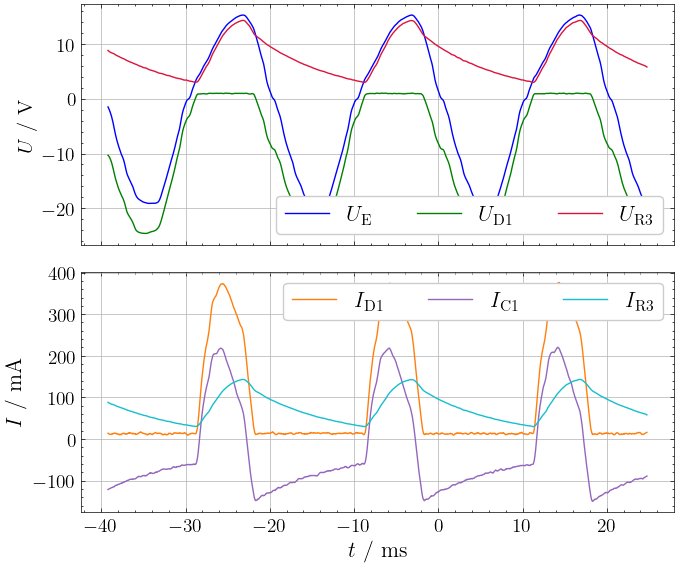

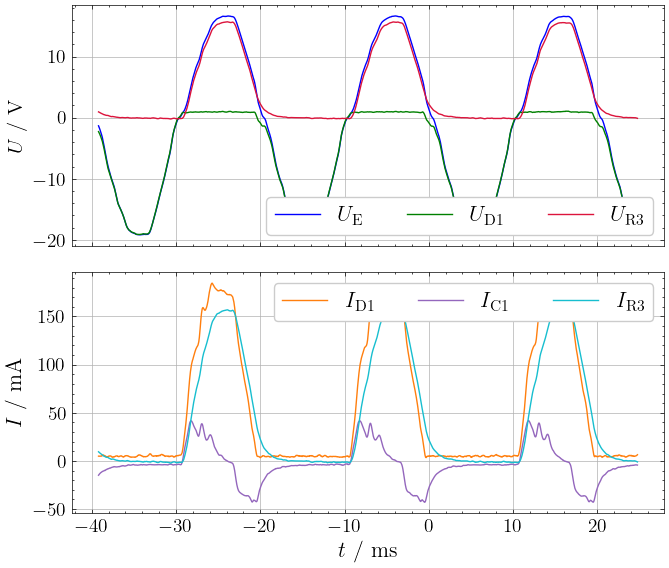

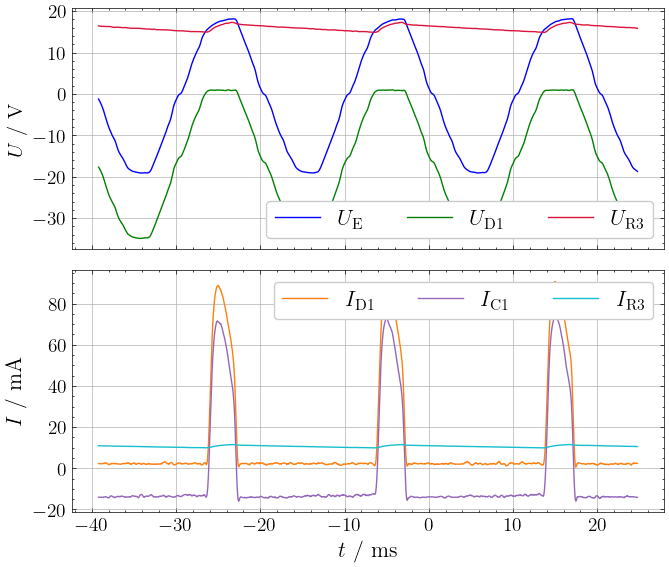

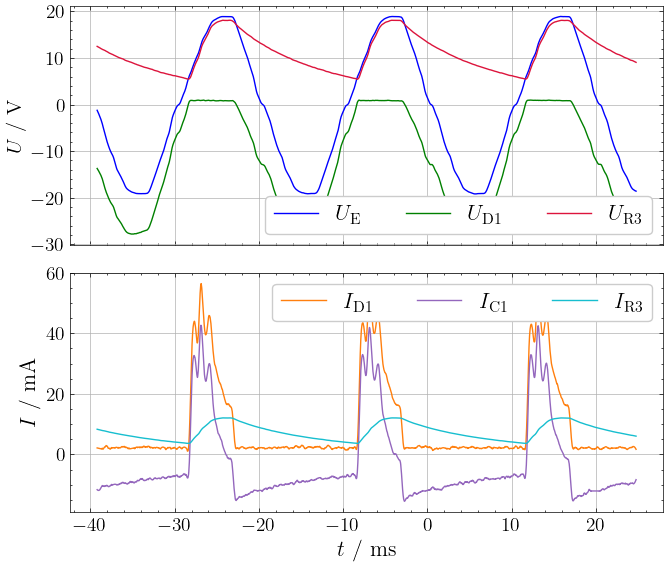

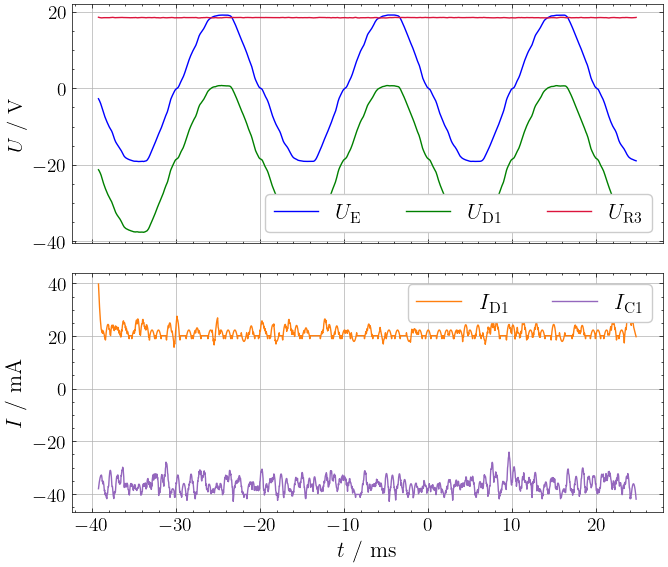

In [14]:
R3 = [100, 100, 1500, 1500, -1, -1] #Ohm
C = [100, 10, 100, 10, 100, 10]

U_eff = [5.940, 3.409, 3.979, 0.633, 0.062, 0.06]
U_gl = [4.496, 7.730, 11.217, 15.961, 18.507, 18.502]

files = get_all_csv()[2:-3]
for i,f in enumerate(files):
    w = U_eff[i] / U_gl[i]
    print(w)
    plot_measurement(f, R3[i], save=False)

## Dual Plots

In [ ]:
def get_values(filepath, R3):
    data = pd.read_csv(f"data/{filepath}", skiprows=2, header=None)

    time, Ch1, Ch2, Ch3, Ch4 = data.T.values
    Ch1 = savgol_filter(Ch1, 21, 2)
    Ch2 = savgol_filter(Ch2, 21, 2)
    Ch3 = savgol_filter(Ch3, 21, 2)
    Ch4 = savgol_filter(Ch4, 21, 2)

    R1, R2 = 10, 10
    time = time * 1000  # ms

    voltages = [
        (r"$U_\mathrm{E}$", Ch2, 'tab:blue'),
        (r"$U_\mathrm{D1}$", Ch2 - Ch4, 'tab:green'),
        (r"$U_\mathrm{R3}$", Ch4, 'tab:red')
    ]
    currents = [
        (r"$I_\mathrm{D1}$", Ch1 * 1000 / R1, 'tab:orange'),
        (r"$I_\mathrm{C1}$", Ch3 * 1000 / R2, 'tab:purple')
    ]
    if R3 > 0:
        currents.append((r"$I_\mathrm{R3}$", Ch4 * 1000 / R3, 'tab:cyan'))

    return time, voltages, currents



def plot_measurements(filepath1, filepath2, R3, save=False):

    time1 , voltages1, currents1 = get_values(filepath1, R3)
    time2 , voltages2, currents2 = get_values(filepath2, R3)

    # --- Create figure with 2 subplots ---
    fig, axes = plt.subplots(2, 2, figsize=(9, 6), sharex=True)
    axV1, axV2 = axes[0]
    axI1, axI2 = axes[1]

    # --- Plot voltages ---
    for label, y, color in voltages1:
        axV1.plot(time1, y, color=color, linewidth=1, label=label)
    axV1.set_ylabel(r"$U$ / V", fontsize=16)
    axV1.grid(True)

    for label, y, color in voltages2:
        axV2.plot(time2, y, color=color, linewidth=1, label=label)
    axV2.grid(True)

    for label, y, color in currents1:
        axI1.plot(time1, y, color=color, linewidth=1, linestyle='-', label=label)
    axI1.set_ylabel(r"$I$ / mA", fontsize=16)
    axI1.set_xlabel(r"$t$ / ms", fontsize=16)
    axI1.grid(True)
    
    for label, y, color in currents2:
        axI2.plot(time2, y, color=color, linewidth=1, linestyle='-', label=label)
    axI2.set_xlabel(r"$t$ / ms", fontsize=16)
    axI2.grid(True)
    
        # --- Collect handles/labels (from the first pair of subplots) ---
    volt_handles, volt_labels = axV1.get_legend_handles_labels()
    curr_handles, curr_labels = axI1.get_legend_handles_labels()

    # --- Add space for legends ---
    fig.subplots_adjust(bottom=0.5)

    # --- Voltage legend (top row) ---
    leg1 = fig.legend(
        volt_handles, volt_labels,
        loc="lower center",
        bbox_to_anchor=(0.5, 0.08),
        ncol=3,
        fontsize=14,
        frameon=True
    )

    # --- Current legend (bottom row) ---
    leg2 = fig.legend(
        curr_handles, curr_labels,
        loc="lower center",
        bbox_to_anchor=(0.5, 0.01),
        ncol=3,
        fontsize=14,
        frameon=True
    )

    fig.add_artist(leg1)

    plt.tight_layout()

    # --- Save figure ---
    if save:
        filename_only = f'V03_Plot_R{R3}'
        os.makedirs("results", exist_ok=True)
        out_path = f"results/{filename_only}.png"
        fig.savefig(out_path, dpi=300)
        print(f"Saved figure to {out_path}")

    return fig

ValueError: bottom cannot be >= top

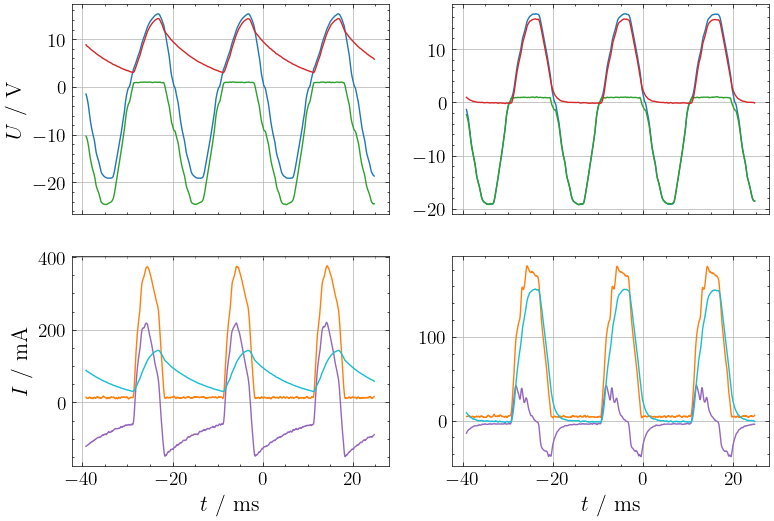

In [28]:
R3 = [100, 100, 1500, 1500, -1, -1] #Ohm
C = [100, 10, 100, 10, 100, 10]

U_eff = [5.940, 3.409, 3.979, 0.633, 0.062, 0.06]
U_gl = [4.496, 7.730, 11.217, 15.961, 18.507, 18.502]

files = get_all_csv()[2:-3]
for i in [0, 2]:
 
    plot_measurements(files[i], files[i+1], R3[i], save=False)

# Versuch 4

In [42]:
def plot_v4(filepath, save):
    # Read data
    data = pd.read_csv(f'data/{filepath}', skiprows=2, header=None)
    time, Ch1, Ch2, Ch3 = data.T.values
    time = time * 1000 #ms

    Ch1 = savgol_filter(Ch1, 21, 2)
    Ch2 = savgol_filter(Ch2*10, 21, 2)
    Ch3 = savgol_filter(Ch3, 21, 2)

    UE = Ch1
    UA = Ch3
    UC1 = Ch1 - Ch2
    UD2 = Ch2 - Ch3

    voltages = [
        (r"$U_\mathrm{E}$", UE, 'blue'),
        (r"$U_\mathrm{A}$", UA, 'crimson'),
        (r"$U_\mathrm{C1}$", UC1, 'tab:green'),
        (r"$U_\mathrm{D2}$", UD2, 'tab:orange')
    ]

    fig, ax = plt.subplots(1, 1, figsize=(6,4))

     # --- Plot voltages ---
    for label, y, color in voltages:
        ax.plot(time, y, color=color, linewidth=1.5, label=label)
    ax.grid(True)
    ax.legend(loc='center right', frameon=True, framealpha=1, fontsize=16)
    ax.set_xlabel(r"$t$ / ms", fontsize=16)
    ax.set_ylabel(r"$U$ / V", fontsize=16)
    
    plt.tight_layout()
    if save:
        filename_only = os.path.splitext(os.path.basename(filepath))[0]
        os.makedirs("results", exist_ok=True)
        out_path = f"results/{filename_only}.png"
        fig.savefig(out_path, dpi=300)
        print(f"Saved figure to {out_path}")
    return fig

Saved figure to results/V04_1500O.png
Saved figure to results/V04_infO.png


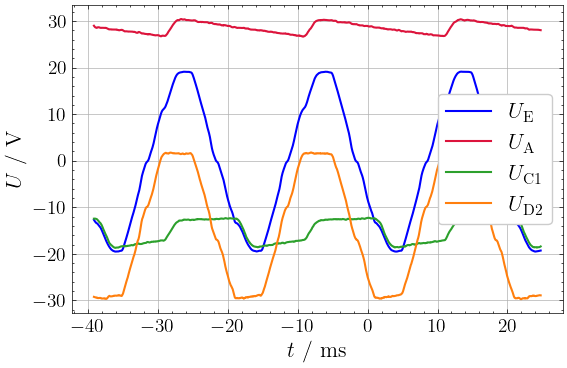

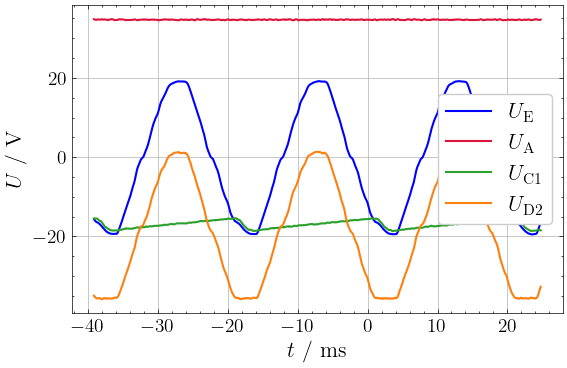

In [43]:
files = get_all_csv()[-2:]
for i,f in enumerate(files):
    plot_v4(f,save=True)